**Chapter 2 Supervised Learning**


**2.3.3 Linear Model**

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


w[0]: 0.393906  b: -0.031804


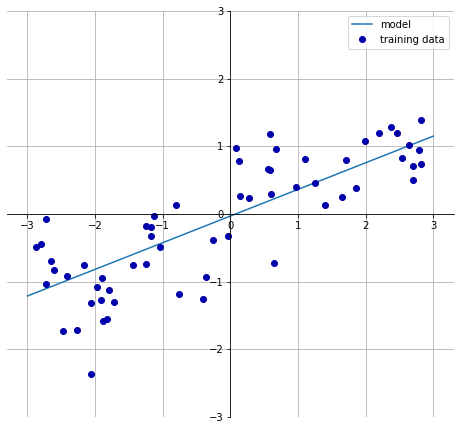

In [2]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 때 직선, 두 개일 때는 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징으로 가지고 있다. 

- Linear regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [4]:
print("Train Set Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lr.score(X_test, y_test)))

Train Set Score: 0.67
Test Set Score: 0.66


R 값이 0.66인 것은 그리 좋은 결과는 아니다. 하지만 훈련세트와 테스트 세트의 점수가 매우 비슷하다.


이는 **과적합**이 아니라 **과소적합(Underfitting)** 으로 간주할 수 있다.


1차원 데이터셋에서는 모델이 단순하므로 과대적합을 걱정할 필요가 없다.


그러나 특성이 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과적합이될 가능성이 높다. 

In [14]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [15]:
print("Train Set Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lr.score(X_test, y_test)))

Train Set Score: 0.95
Test Set Score: 0.61


- Lidge Regression

릿지 회귀에서는 가중치 선택이 훈련 데이터를 잘 예측하는 것만이 아니라, 추가 제약 조건을 만족시키기 위한 목적도 있다.

가중치의 절댓값을 가능한 작게 만드는 것. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원하는 모델이다. 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한응로 만드는 것(기울기를 작게 만듦) 이런 제약을 규제(Regularization)이라고 한다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 것이다. 리싲 회귀에서 사용되는 규제 방식을 **L2** 규제라고 한다.

cf) 수학적으로 릿지는 계수의 L2 norm의 제곱을 패널티로 적용한다. 

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Train set score: 0.89
Test set score: 0.75


Ridge는 모델을 단순하게(계수가 0에 가깝게) 해주고, 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공한다.

사용자는 alpha매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다. 앞의 코드에서는 매개변수 alpha의 값이 1.0으로 설정되어 있는 것. 

단, 최적의 alpha값은 데이터셋에 달려있다. alpha값을 높이면 계수를 0에 더 가깝게(패널티의 효과가 커지고 = 가중치 감소) 만들어서 훈련 데이터 성능은 나빠지지만 일반화에 도움을 줄 수 있다. alpha 값을 줄이면, 계수에 대해 그만큼 제약이 풀리면서 LinearRegression으로 만든 모델과 거의 같게 된다.

In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Train set score: 0.79
Test set score: 0.64


In [9]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Train set score: 0.93
Test set score: 0.77


다음 코드로, alpha값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있다. 높은 alpha값은 제약이 더 많은 모델이므로 coef_의 절댓값 크기가 작을 것으로 예상할 수 있다.

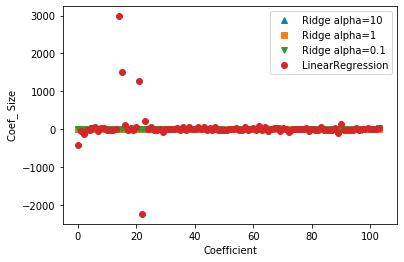

In [18]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient")
plt.ylabel("Coef_ Size")
plt.hlines(0, 0, len(lr.coef_)) # 지정 위치에 수직 수평선을 그리는 것
plt.legend()

규제의 효과를 이해하는 또 다른 방법은, alpha값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것. 

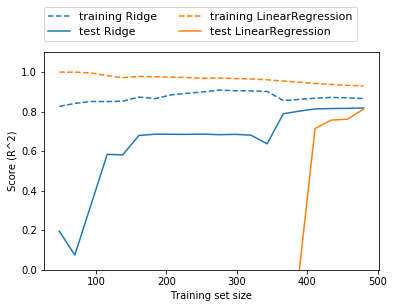

In [22]:
mglearn.plots.plot_ridge_n_samples()

위의 그림은 보스턴 주택가격 데이터셋에 대한 릿지 회귀와 선형 회귀의 학습곡선이다.

두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형회귀가 릿지 회귀를 따라잡았다. 이는 데이터가 충분히 많은 경우 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 수 있는 것. 데이터 셋의 크기가 커지면 과적합 방지에도 도움을 준다. 

- Lasso

Lasso 또한, Ridge와 마찬가지로 계쑤를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개 변수를 지원한다
하지만 L1 노름을 사용하는 (절대값의 합) 점이 릿지 회귀와 다른 점이다. 또한, 계수를 완전한 0으로 만드는 점이 다른 점이다. 
이를 이용해서, feature selection을 할 수 있다. 

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Train Set Score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test Set SCore: {:.2f}".format(lasso.score(X_test, y_test)))
print("N Features: {}".format(np.sum(lasso.coef_ != 0 )))

Train Set Score: 0.29
Test Set SCore: 0.21
N Features: 4


In [25]:
# max_iter: 반복 실행하는 최대 횟수
# 위의 결과가 너무 좋지 못하므로, alpha 값을 조정하여 과소적합을 방지
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [27]:
print("Train Set Score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("N Features {}".format(np.sum(lasso001.coef_ != 0)))      

Train Set Score: 0.90
Test Set Score: 0.77
N Features 33


In [28]:
# alpha를 너무 낮추면 과적합이 될 가능성이 높으며, Linear Regression과 흡사하게 된다. (규제가 작아지니까)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Train Set Score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("N Features {}".format(np.sum(lasso00001.coef_ != 0)))   

Train Set Score: 0.95
Test Set Score: 0.64
N Features 96


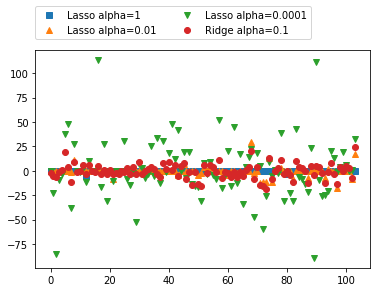

In [31]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))